# Linear Regression

As discussed in class, the linear regression works by identifying a linear function of the input features:
$$\hat{y}=\sum_{j=0}^{p}\hat{\beta}_{j}X_{j}$$
To work with linear regression in Python, we can make use of the existing [numpy](https://numpy.org/) and [scikit-learn](https://scikit-learn.org/) libraries. Let's start by importing them (and a [matplotlib](https://matplotlib.org/) for some plotting of the results):

In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

## Our Training Data (note: same process as for Lecture 5)

We'll also need some data to act as the historical observations from our problem. For this example, we'll just make some up (but usually, you'd be given this data). In this case, we (the people doing the work) actually know the underlying function $f(X)$, but from the modelling perspective this function is not known:

In [2]:
def f(X):
    return (X[:, 0] + 0.5)**2 + 0.25 * np.sin(4 * np.pi * X[:, 0])

Now, we will use this function to generate some training data (it is still called training data, even though no real training takes place in k-Nearest Neighbours):

In [3]:
rng = np.random.default_rng(1234) ## notice the fixed seed for reproducability

X_train = rng.uniform(-1, 1, size=50).reshape((-1, 1))
y_train = f(X_train) + rng.normal(0, 0.1, size=len(X_train))

## we'll also generate some "test" data use this to test the shape of our learned function shortly
X = np.linspace(-1, 1, 500).reshape((-1, 1))
y = f(X)

Let's take a look at the data (and underlying generating function) before moving on to modelling:

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.2, label='Sampled Training Data')
plt.plot(X, y, color='black', label='True Underlying Function - f(X)')
plt.title('Our Sampled Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

<Figure size 720x432 with 0 Axes>

## Applying Linear Regression

Now that we have a training set of data, we can move onto modelling. We do this by instantiating a LinearRegression model, calling the fit function, and then making predictions from the resulting model with the predict function. Note that in its basic form, linear regression has no hyperparameters (that nice! :)).

0.6384518203472579 [1.0382354]


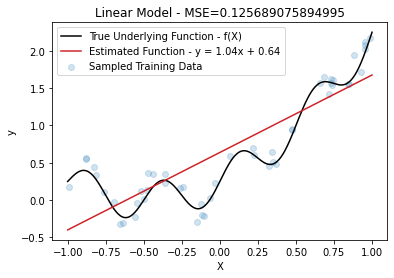

In [5]:
X = np.linspace(-1, 1, 500).reshape((-1, 1))

mdl = LinearRegression()
mdl.fit(X_train, y_train)
print(mdl.intercept_, mdl.coef_)

y_pred = mdl.predict(X)
loss = mean_squared_error(f(X), y_pred)

plt.scatter(X_train, y_train, alpha=0.2, label='Sampled Training Data')
plt.plot(X, f(X), color='black', label='True Underlying Function - f(X)')
plt.plot(X, y_pred, color='#ce2227', label='Estimated Function - y = {}x + {}'.format(np.round(mdl.coef_[0], 2), np.round(mdl.intercept_, 2)))
plt.title('Linear Model - MSE={}'.format(loss))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In the resulting plot, the red line represents the model that was extracted from the training data by linear regression. Note that this is a straight line, and has captured the general trend of the data, but none of the nuance. On the plus side, this means that the modelling process is likely to be relatively insensitive to noise!

As discussed in the lecture, a linear model is "just" a weighted sum of our input features. Therefore, if we want it to be more sensitive to the data (and hence produce a more flexible model), then we can add additional input features that are "nonlinear transformations" of our existing features. For example, we could add a squared version of our feature (i.e., $x^2$) to our training data:

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(X_train)

array([[ 0.95339953,  0.90897067],
       [-0.23960853,  0.05741225],
       [ 0.84649247,  0.7165495 ],
       [-0.47661515,  0.227162  ],
       [-0.36180588,  0.1309035 ],
       [-0.76381753,  0.58341723],
       [-0.51646741,  0.26673859],
       [-0.36293214,  0.13171974],
       [ 0.92815849,  0.86147818],
       [-0.47270039,  0.22344566],
       [-0.11798776,  0.01392111],
       [ 0.21974162,  0.04828638],
       [ 0.72724259,  0.52888179],
       [ 0.72751534,  0.52927857],
       [ 0.34976263,  0.1223339 ],
       [ 0.3197487 ,  0.10223923],
       [ 0.4715154 ,  0.22232677],
       [-0.55449268,  0.30746214],
       [-0.65586763,  0.43016235],
       [ 0.74082994,  0.54882901],
       [-0.87972268,  0.773912  ],
       [ 0.36737782,  0.13496646],
       [ 0.34247604,  0.11728984],
       [ 0.22203596,  0.04929997],
       [-0.87972537,  0.77391673],
       [ 0.95553855,  0.91305392],
       [-0.12209675,  0.01490762],
       [ 0.06519004,  0.00424974],
       [-0.99373543,

Notice that we now have effectively two input features (it's just that one is a squared version of the other!). Let's use these for modelling the problem through linear regression:

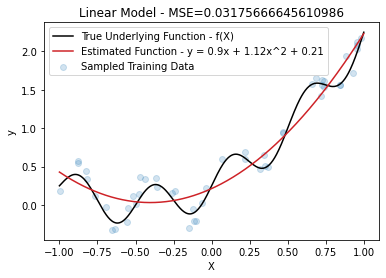

In [7]:
mdl = LinearRegression()
mdl.fit(poly.fit_transform(X_train), y_train)

y_pred = mdl.predict(poly.transform(X))
loss = mean_squared_error(f(X), y_pred)

plt.scatter(X_train, y_train, alpha=0.2, label='Sampled Training Data')
plt.plot(X, f(X), color='black', label='True Underlying Function - f(X)')
plt.plot(X, y_pred, color='#ce2227', label='Estimated Function - y = {}x + {}x^2 + {}'.format(np.round(mdl.coef_[0], 2), np.round(mdl.coef_[1], 2), np.round(mdl.intercept_, 2)))
plt.title('Linear Model - MSE={}'.format(loss))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Clearly, that's a much better fit! We'll cover this idea of "feature engineering" in later lectures and labs. **(note: we only knew to add this squared term because we've got a good undertanding of the problem - it's not some magic formula that works for everything, and adding the right feature transformations can sometimes require a bit of work)**

For now, that's pretty much all of the basics of linear regression covered! Like k-Nearest Neighbour, it's a great starting point for modelling, and when used with due care and consideration, can produce great results!